# Introduction to data analytics with pandas

In [35]:
import pandas as pd

## A little about the hero of this story

<center><img src="images/coffee_machine.jpg" width="400px" /></center>

This dataset was collected at the Mathematics Institute at the University of Warwick. It's a time-series dataset, describing the **total number of coffees made by our espresso machine** by a certain date.

## Key questions

1. Who are the main contributors to this dataset, and when are contributions generally made ?
2. What are the department's weekday coffee habits ?
3. How much coffee are people drinking ?

## Getting Started

Before starting, make sure you have all the libraries installed and imported.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Importing the data

Let's import the coffee data from CSV.

In [74]:
# Read data from data/coffees.csv
data = pd.read_csv('data/coffees.csv')
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


**Note :** Pandas offers many functions to read different types of file formats. You can refer the [documentation](https://medium.com/r/?url=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Fuser_guide%2Fio.html) for the same. 



# Overview of the Data

In [75]:
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,testing,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


We have an index, and three columns : `timestamp`, `coffees`, and `contributor`.

coffees column should be just number of coffees but it contains a string named `testing`. Thus we need to further analyze this column to clean it.

#### Let's look at that string in the third row.

In [76]:
# [] indexing on a series
data['coffees'].head()

0      397.0
1      410.0
2    testing
3        NaN
4      464.0
Name: coffees, dtype: object

#### How long is the dataset ?

In [77]:
print("Dataset length :")

# len()
print(len(data))

Dataset length :
671


#### Descriptive statistics for the dataset

In [78]:
# .describe()
data.describe()

,timestamp,coffees,contributor
count,671,658,671
unique,671,654,9
top,2012-10-12 13:34:00,7216.0,Quentin
freq,1,2,367


Looks like we also have some missing data - we have 671 rows, but the `coffees` column only has 658 entries.

#### Let's look at the dataframe where `coffees` is null.

In [79]:
# .isnull() and boolean indexing with []
data[data.coffees.isnull()]

,timestamp,coffees,contributor
3,2011-10-05 08:25:00,NaN,Quentin
15,2011-10-07 14:10:00,NaN,Ben
72,2011-10-28 10:53:00,NaN,Mike M
95,2011-11-11 11:13:00,NaN,Quentin
323,2012-06-10 16:10:00,NaN,Sergio
370,2012-07-13 13:59:00,NaN,Mike
394,2012-08-03 14:35:00,NaN,Sergio
479,2012-09-21 10:15:00,NaN,Sergio
562,2012-11-01 09:45:00,NaN,Quentin
606,2012-11-30 13:11:00,NaN,Quentin


#### Data types for each column

In [80]:
# .dtypes
data.dtypes

timestamp      object
coffees        object
contributor    object
dtype: object

The `contributor` column makes sense as `object`, because we expect strings there; but surely the `timestamp` should be a timestamp-type, and `coffees` should be numerical ?

## Cleaning the data

#### The `coffees` column should only contain numerical data.

In [81]:
# cast the coffees column using pd.to_numeric, and coerce errors
data.coffees = pd.to_numeric(data['coffees'], errors='coerce')

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
2,2011-10-05 07:02:00,NaN,Anthony
3,2011-10-05 08:25:00,NaN,Quentin
4,2011-10-05 10:47:00,464.0,Quentin


 #### The `coffees` column contains NaNs.

In [82]:
# Use .dropna() using a subset, and pass inplace
data.dropna(subset = ['coffees'], inplace = True)

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397.0,Quentin
1,2011-10-04 11:48:00,410.0,Quentin
4,2011-10-05 10:47:00,464.0,Quentin
5,2011-10-05 13:15:00,481.0,Quentin
6,2011-10-06 07:21:00,503.0,Anthony


#### Convert the coffees column from floatt to int.

In [84]:
# Cast to int using .astype()
data.coffees = data['coffees'].astype(int)

data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


#### Convert the timestamp column to datetime data type. 

In [85]:
# pd.to_datetime()
data.timestamp = pd.to_datetime(data['timestamp'])

# Confirm dtypes
data.dtypes

timestamp      datetime64[ns]
coffees                 int32
contributor            object
dtype: object

In [86]:
data.head()

,timestamp,coffees,contributor
0,2011-10-03 08:22:00,397,Quentin
1,2011-10-04 11:48:00,410,Quentin
4,2011-10-05 10:47:00,464,Quentin
5,2011-10-05 13:15:00,481,Quentin
6,2011-10-06 07:21:00,503,Anthony


## The time-series at a glance

#### Let's begin by visualising the coffee counts.

<AxesSubplot:>

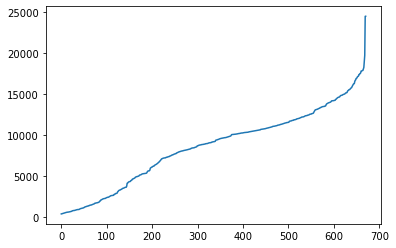

In [87]:
# .plot() on the coffees series
data['coffees'].plot()

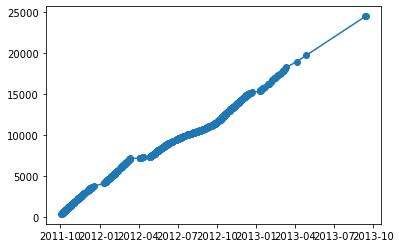

In [88]:
# .plot() on the dataframe, 
# pass x kwarg to plot against the timestamp
# use a dot-dash style
# data.plot(x=data['timestamp'], style = '.-')
plt.plot(data['timestamp'], data['coffees'], linestyle = '-', marker = 'o')

We have some very uneven spacing in places. We might start by cutting off the last few points of this time-series, which is missing a lot of data.

#### We'll inspect the last few points of this time-series.

In [89]:
# .tail() with ten rows
data.tail(10)

,timestamp,coffees,contributor
661,2013-03-04 11:12:00,17793,Quentin
662,2013-03-04 16:43:00,17824,Quentin
663,2013-03-05 10:42:00,17852,Quentin
664,2013-03-05 13:29:00,17868,Quentin
665,2013-03-08 10:28:00,18062,Quentin
666,2013-03-12 08:28:00,18235,Sergio
667,2013-04-05 11:20:00,18942,Sergio
668,2013-04-27 11:04:00,19698,Sergio
669,2013-09-12 15:38:00,24450,Quentin
670,2013-09-13 10:28:00,24463,Quentin


After mid-March, things start getting spaced rather erratically.

#### Let's cut off the tail of the time-series, anything after 2013-03-01.

In [90]:
# Use conditional indexing against the timestamp
data = data[data['timestamp'] < '2013-03-01']
data.tail()

,timestamp,coffees,contributor
655,2013-02-21 13:44:00,17345,Quentin
656,2013-02-21 15:02:00,17354,Quentin
657,2013-02-25 13:33:00,17468,Quentin
658,2013-02-25 17:25:00,17489,Quentin
659,2013-02-27 09:33:00,17564,Quentin


#### One final look.

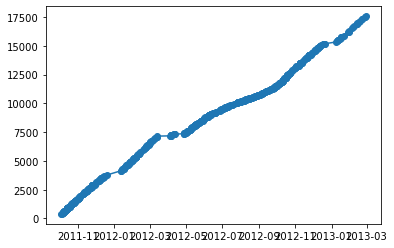

In [91]:
# Once again, plot the data against the timestamp
plt.plot(data['timestamp'], data['coffees'], linestyle = '-', marker = 'o')

## Playing around with time-series data

#### Who are our main contributors ?

In [92]:
# .value_counts()
data['contributor'].value_counts()

Quentin    354
Mike       152
Sergio      89
Mike M      29
Colm        12
Anthony      4
Ben          3
Stefano      2
Arturo       1
Name: contributor, dtype: int64

#### Let's plot this.

<AxesSubplot:>

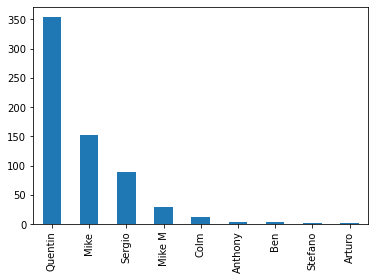

In [94]:
# .plot() a bar chart of the value counts
data['contributor'].value_counts().plot(kind = 'bar')

#### On which weekdays were contributions made ?

In [96]:
data['weekdays'] = data['timestamp'].dt.weekday

data.head()

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,0
1,2011-10-04 11:48:00,410,Quentin,1
4,2011-10-05 10:47:00,464,Quentin,2
5,2011-10-05 13:15:00,481,Quentin,2
6,2011-10-06 07:21:00,503,Anthony,3


#### Can we replace these integers with actual weekdays ?

In [97]:
weekday_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

data['weekdays'] = data['timestamp'].dt.day_name()

data.head() 

,timestamp,coffees,contributor,weekdays
0,2011-10-03 08:22:00,397,Quentin,Monday
1,2011-10-04 11:48:00,410,Quentin,Tuesday
4,2011-10-05 10:47:00,464,Quentin,Wednesday
5,2011-10-05 13:15:00,481,Quentin,Wednesday
6,2011-10-06 07:21:00,503,Anthony,Thursday


#### Let's group by these weekdays.

In [98]:
# .groupby() the weekdays and then .count() rows in each group
weekday_counts = data.groupby('weekdays').count()

# We can reorder this dataframe by our weekday_names 
# list using .loc, indexing with the names
weekday_counts = weekday_counts.loc[weekday_names]

weekday_counts

,timestamp,coffees,contributor
weekdays,,,
Monday,145,145,145
Tuesday,97,97,97
Wednesday,131,131,131
Thursday,117,117,117
Friday,114,114,114
Saturday,29,29,29
Sunday,13,13,13


#### We can now visualise these weekday counts.

<AxesSubplot:xlabel='weekdays'>

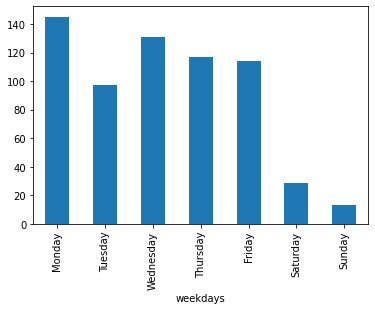

In [99]:
# Plot a bar chart of the coffees data in weekday_counts
# Title : "Datapoints added on each weekday"
weekday_counts['coffees'].plot(kind='bar')

## 2. Weekday trends

#### First, we'll set our timestamps to the dataframe's index

In [100]:
# Set the dataframe's .index property
data.index = data['timestamp']

# Let's drop the timestamp column, as we no longer need it
data.drop(columns='timestamp', inplace=True)

data.head()

,coffees,contributor,weekdays
timestamp,,,
2011-10-03 08:22:00,397,Quentin,Monday
2011-10-04 11:48:00,410,Quentin,Tuesday
2011-10-05 10:47:00,464,Quentin,Wednesday
2011-10-05 13:15:00,481,Quentin,Wednesday
2011-10-06 07:21:00,503,Anthony,Thursday


#### Let's add some rows at midnight on every day.

In [101]:
# pd.date_range, with daily frequency, and normalisation
midnights = pd.date_range(data.index[0], data.index[-1], freq='D', normalize=True)

midnights 

DatetimeIndex(['2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-08', '2011-10-09', '2011-10-10',
               '2011-10-11', '2011-10-12',
               ...
               '2013-02-18', '2013-02-19', '2013-02-20', '2013-02-21',
               '2013-02-22', '2013-02-23', '2013-02-24', '2013-02-25',
               '2013-02-26', '2013-02-27'],
              dtype='datetime64[ns]', length=514, freq='D')

#### Let's take the union of this index and our dataset's index.

In [102]:
# Take the union of the existing and new indices
new_index = midnights.union(data.index)

new_index

DatetimeIndex(['2011-10-03 00:00:00', '2011-10-03 08:22:00',
               '2011-10-04 00:00:00', '2011-10-04 11:48:00',
               '2011-10-05 00:00:00', '2011-10-05 10:47:00',
               '2011-10-05 13:15:00', '2011-10-06 00:00:00',
               '2011-10-06 07:21:00', '2011-10-06 10:04:00',
               ...
               '2013-02-21 15:02:00', '2013-02-22 00:00:00',
               '2013-02-23 00:00:00', '2013-02-24 00:00:00',
               '2013-02-25 00:00:00', '2013-02-25 13:33:00',
               '2013-02-25 17:25:00', '2013-02-26 00:00:00',
               '2013-02-27 00:00:00', '2013-02-27 09:33:00'],
              dtype='datetime64[ns]', length=1160, freq=None)

**Note :** the union of these indices is just a new index where entries from both indices are present. It's sorted by time.

#### Now we can reindex our dataframe with this new index.

In [103]:
# .reindex() the dataframe to get an upsampled dataframe
upsampled_data = data.reindex(new_index)

upsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.0,Quentin,Monday
2011-10-04 00:00:00,NaN,NaN,NaN
2011-10-04 11:48:00,410.0,Quentin,Tuesday
2011-10-05 00:00:00,NaN,NaN,NaN
2011-10-05 10:47:00,464.0,Quentin,Wednesday
2011-10-05 13:15:00,481.0,Quentin,Wednesday
2011-10-06 00:00:00,NaN,NaN,NaN
2011-10-06 07:21:00,503.0,Anthony,Thursday
2011-10-06 10:04:00,513.0,Quentin,Thursday


**Note :** `.reindex()` keeps any values that conform to the new index, and inserts `NaN`s where we have no values.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html

#### We can fill in these `NaN`s using interpolation.

In [104]:
# .interpolate the upsampled_data using the time method
upsampled_data = upsampled_data.interpolate(method='time')

upsampled_data.head(10)

,coffees,contributor,weekdays
2011-10-03 00:00:00,NaN,NaN,NaN
2011-10-03 08:22:00,397.000000,Quentin,Monday
2011-10-04 00:00:00,404.408262,NaN,NaN
2011-10-04 11:48:00,410.000000,Quentin,Tuesday
2011-10-05 00:00:00,438.664249,NaN,NaN
2011-10-05 10:47:00,464.000000,Quentin,Wednesday
2011-10-05 13:15:00,481.000000,Quentin,Wednesday
2011-10-06 00:00:00,494.066298,NaN,NaN
2011-10-06 07:21:00,503.000000,Anthony,Thursday
2011-10-06 10:04:00,513.000000,Quentin,Thursday


#### We're now ready to resample the time-series at a daily frequency.

In [105]:
# .resample() the upsampled dataframe,
# using .asfreq() to get only exactly daily values
daily_data = upsampled_data.resample('D').asfreq()

# Drop the contributor column, we no longer need it
daily_data = daily_data.drop(columns='contributor')

# Generate a column of weekday_names
daily_data["weekdays"] = daily_data.index.day_name()

daily_data.head()

,coffees,weekdays
2011-10-03,NaN,Monday
2011-10-04,404.408262,Tuesday
2011-10-05,438.664249,Wednesday
2011-10-06,494.066298,Thursday
2011-10-07,572.844311,Friday


<AxesSubplot:>

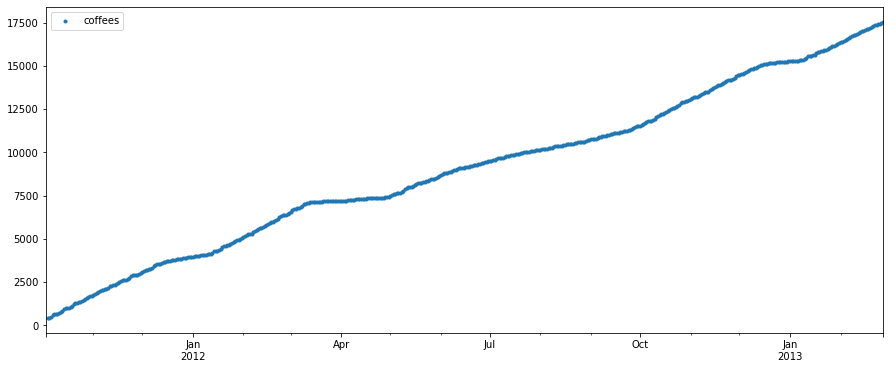

In [106]:
# Let's plot the data once more, to see how we're doing
daily_data.plot(figsize=(15,6), style='.')

#### Let's begin by figuring out how many coffees are made on any given day.

In [107]:
# Use .diff() on the coffees column; follow up with .shift()
coffees_made = daily_data['coffees'].diff().shift(-1)
# Add this as a column to the dataframe
daily_data["coffees_made_today"] = coffees_made

daily_data.head(n=10)

,coffees,weekdays,coffees_made_today
2011-10-03,NaN,Monday,NaN
2011-10-04,404.408262,Tuesday,34.255987
2011-10-05,438.664249,Wednesday,55.402049
2011-10-06,494.066298,Thursday,78.778013
2011-10-07,572.844311,Friday,64.392941
2011-10-08,637.237253,Saturday,7.492196
2011-10-09,644.729448,Sunday,8.195209
2011-10-10,652.924658,Monday,81.648549
2011-10-11,734.573206,Tuesday,46.351008
2011-10-12,780.924214,Wednesday,71.254295


**Note :** we use `.shift()` here because if we look at the `.diff()` between a Monday and a Tuesday, those coffees are attributed to the Tuesday. However, what we want to say is "this many coffees were made at some point on the Monday", so we shift the entire series up one.

#### Now we can group this by weekday.

In [108]:
# .groupby weekdays, take the mean, and
# grab the coffees_made_today column
coffees_by_day = daily_data.groupby('weekdays')['coffees_made_today'].mean()

coffees_by_day

weekdays
Friday       34.138034
Monday       37.802404
Saturday     16.299858
Sunday       15.768215
Thursday     43.500824
Tuesday      39.132964
Wednesday    47.640057
Name: coffees_made_today, dtype: float64

#### Let's order this series and then plot it.

<AxesSubplot:xlabel='weekdays'>

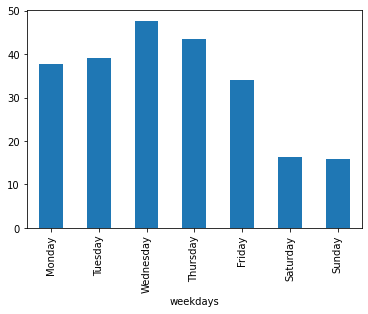

In [109]:
# Sort coffees_by_day by our list of weekend names
coffees_by_day = coffees_by_day[weekday_names]
# coffees_by_day
# Plot a bar chart
coffees_by_day.plot(kind='bar')

## 3. Coffee per person

#### We can now pull in data on how many people were in the department.

In [110]:
# Bring in data/department_members.csv;
# have the first column be the index, and parse the dates
people = pd.read_csv('data/department_members.csv', parse_dates=True, index_col=[0])

people.head()

,members
date,
2011-08-31,12
2011-09-30,14
2011-10-31,14
2011-11-30,14
2011-12-31,15


#### Let's join the datasets.

In [111]:
# Use an outer join, then interpolate over 
# missing values using nearest values
daily_data = daily_data.join(people, how="outer").interpolate(method="nearest")
daily_data.head(n=15)

,coffees,weekdays,coffees_made_today,members
2011-08-31,NaN,NaN,NaN,12.0
2011-09-30,NaN,NaN,NaN,14.0
2011-10-03,NaN,Monday,NaN,14.0
2011-10-04,404.408262,Tuesday,34.255987,14.0
2011-10-05,438.664249,Wednesday,55.402049,14.0
2011-10-06,494.066298,Thursday,78.778013,14.0
2011-10-07,572.844311,Friday,64.392941,14.0
2011-10-08,637.237253,Saturday,7.492196,14.0
2011-10-09,644.729448,Sunday,8.195209,14.0
2011-10-10,652.924658,Monday,81.648549,14.0


**Note :** by default, inner joins are performed. That is, if a row from one of the datasets has an index that isn't in the other dataset, that row is dropped. You can specify whether you want outer, left, or right joins, as well plenty of other useful options. The `pandas` API for joining or merging datasets is very developed.

https://pandas.pydata.org/pandas-docs/stable/merging.html

#### Let's create a column for the number of coffees consumed per person.

In [112]:
# New column is the ratio of coffees made on a
# given day to number of members in the department
daily_data["coffees_per_person"] = daily_data['coffees_made_today']/daily_data['members']

# Let's drop those remaining NaNs while we're at it


daily_data.head(n=10)

,coffees,weekdays,coffees_made_today,members,coffees_per_person
2011-08-31,NaN,NaN,NaN,12.0,NaN
2011-09-30,NaN,NaN,NaN,14.0,NaN
2011-10-03,NaN,Monday,NaN,14.0,NaN
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289
2011-10-06,494.066298,Thursday,78.778013,14.0,5.627001
2011-10-07,572.844311,Friday,64.392941,14.0,4.599496
2011-10-08,637.237253,Saturday,7.492196,14.0,0.535157
2011-10-09,644.729448,Sunday,8.195209,14.0,0.585372
2011-10-10,652.924658,Monday,81.648549,14.0,5.832039


#### We can now plot this column.

<AxesSubplot:>

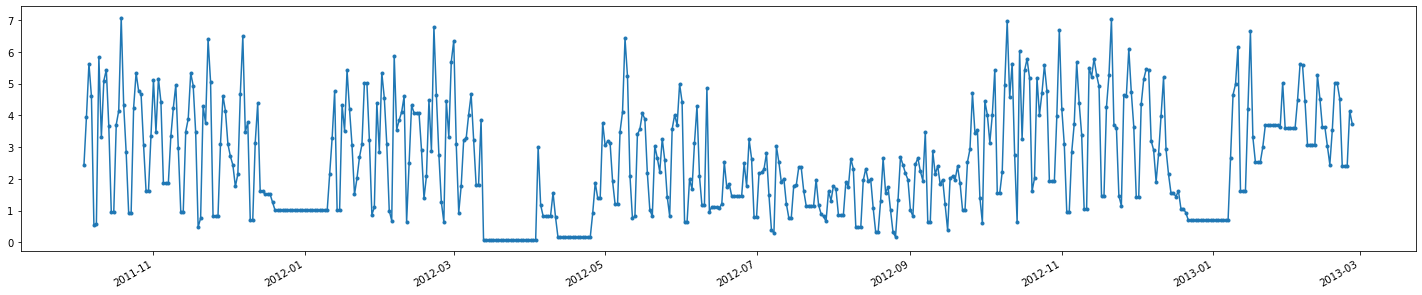

In [113]:
# Plot the coffees_per_person column
daily_data['coffees_per_person'].plot(style = '.-', figsize=(25,5))

This plot shows a weekend effect as number of coffees decreases on Weekends then goes up. 

#### Those are strange plateaus. We'll pull in another dataset, telling us when the machine was broken.

In [114]:
# read data/coffee_status.csv
# parse_dates as kwarg; also pass index_col
machine_status = pd.read_csv('data/coffee_status.csv', parse_dates=True, index_col='date')

machine_status.head()

,status
date,
2011-09-16,OK
2011-09-17,OK
2011-09-18,OK
2011-09-19,OK
2011-09-20,OK


**Note :** the `parse_dates` keyword argument takes several values. By passing in a list of strings, we're telling `pandas` to attempt to parse the dates in columns with those names.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

#### What values are in the `status` column ?

In [115]:
machine_status.shape

(602, 1)

In [116]:
# .value_counts()
machine_status.value_counts()

status
OK        514
BROKEN     88
dtype: int64

#### A quick trick to plot this as a time-series...

<AxesSubplot:xlabel='date'>

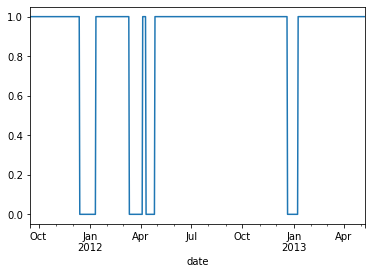

In [117]:
# Make a pd.Series from the status series where things are OK
numerical_status = (machine_status['status'] == 'OK').astype('float')

numerical_status.plot()

**Note :** the first line here creates a boolean `pd.Series`, holding the value `True` when `machine_status.status` is `"OK"`, and `False` otherwise. Because it's a `pd.Series`, its index stays the same as that of `machine_status`, which was a `DatetimeIndex`. Then, we can plot the boolean series ( `True` appearing as `1`, and `False` appearing as `0` ), and just quickly scan to see that there are long areas where the coffee machine was operations, with short bouts ( thankfully ! ) of the machine being broken.

#### Let's join the datasets on the date field !

In [118]:
# .join() daily_data with machine_status
daily_data = daily_data.join(machine_status)

daily_data.head()

,coffees,weekdays,coffees_made_today,members,coffees_per_person,status
2011-08-31,NaN,NaN,NaN,12.0,NaN,NaN
2011-09-30,NaN,NaN,NaN,14.0,NaN,OK
2011-10-03,NaN,Monday,NaN,14.0,NaN,OK
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856,OK
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289,OK


#### We'll bring in this numerical representation of status column into our dataframe too.

In [119]:
# Column depicting when the status was "OK"
# Cast the series to ints before as you create a new column in the dataframe
daily_data["numerical_status"] = (daily_data['status'] == 'OK').astype('float') * 100

daily_data.head()

,coffees,weekdays,coffees_made_today,members,coffees_per_person,status,numerical_status
2011-08-31,NaN,NaN,NaN,12.0,NaN,NaN,0.0
2011-09-30,NaN,NaN,NaN,14.0,NaN,OK,100.0
2011-10-03,NaN,Monday,NaN,14.0,NaN,OK,100.0
2011-10-04,404.408262,Tuesday,34.255987,14.0,2.446856,OK,100.0
2011-10-05,438.664249,Wednesday,55.402049,14.0,3.957289,OK,100.0


#### Let's plot both the coffees per person and the numerical status.

<AxesSubplot:>

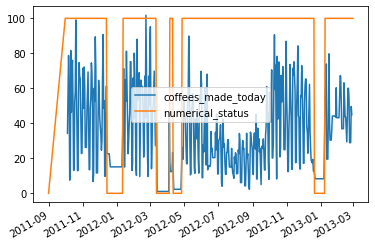

In [120]:
# Plot both columns on the same graph, using default args
daily_data[['coffees_made_today', 'numerical_status']].plot()

#### We see a strong weekday-weekend effect. Resampling weekly will fix that.

<AxesSubplot:>

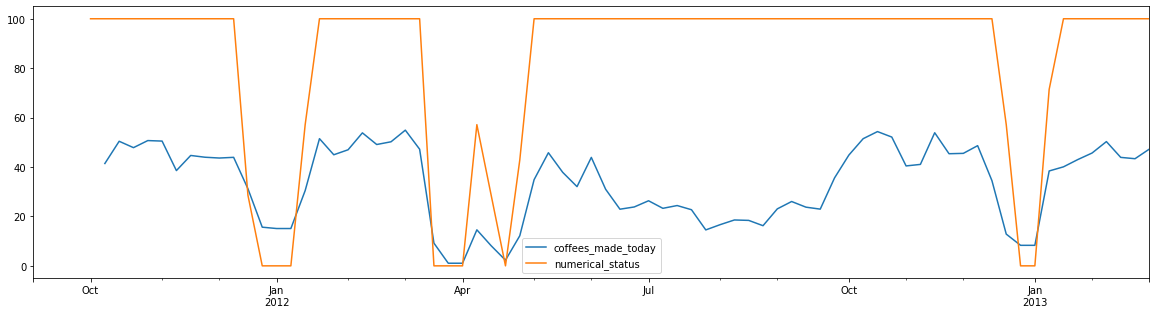

In [121]:
# Resample weekly, taking the mean
# of each week to get a weekly value
weekly_data = daily_data.resample('W').mean()
# Plot the coffees per person and the machine's status
weekly_data[["coffees_made_today", "numerical_status"]].plot(figsize=(20,5))

## What have we achieved ?

#### Cleaning

- Cast columns to the correct dtypes
- Dropped rows with no data
- Truncated the time-series when things got sparse

#### Exploring the contributions

- Discovered who contributed to the dataset and how much
- Established how contributions varied by day of the week

#### Exploring the time-series

- Resampled the uneven time-series to regular daily intervals
- Interpolated over missing data using our time index
- Discovered on what days of the week coffee was especially popular
- Joined the dataset with others to enrich the information available
- Derived new columns from existing ones
- Smoothed the time-series by weekly downsampling

#### Insights

- A small number of people contributed most of the data
- Contributions were lacking at the weekends, and Mondays had the most contributions
- Seminar Wednesdays is a strong driver of coffee consumption
- Periods of low coffee drinking correlated strongly with periods where the machine was broken
- A significant dip in consumption occurred in the summer months